# Task 04

# Importing Required Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Loading and Initial Data Exploration

In [2]:
data= pd.read_csv('twitter_training.csv')

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Assign proper column names
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('twitter_training.csv', names=col_names)

In [5]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Data Summary

In [6]:
df.shape

(74682, 4)

In [7]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

# Data Cleaning and Preparation

## Handling missing values and duplicates

In [8]:
# Check for missing values
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [9]:
# Remove rows with missing values
df.dropna(axis=0,inplace=True)

In [10]:
# Missing values after cleaning
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [18]:
# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Duplicates after removal
df.duplicated().sum()

np.int64(0)

In [19]:
# Final dataset 
print("Final dataset shape:", df.shape)

Final dataset shape: (71656, 4)


# Sentiment Analysis

## Analyzing the distribution of sentiments across all tweets

In [20]:
sentiment_counts = df['Sentiments'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)


Sentiment distribution:
Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


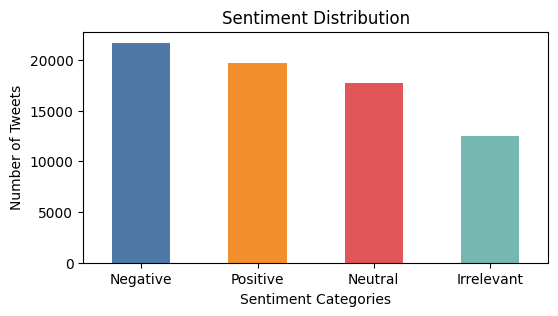

In [28]:
# Visualizing sentiment distribution
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

# Brand-Specific Sentiment Analysis

## Focusing on Microsoft as a case study


In [22]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
print("\nMicrosoft sentiment distribution:")
print(brand_sentiment_counts)


Microsoft sentiment distribution:
Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64


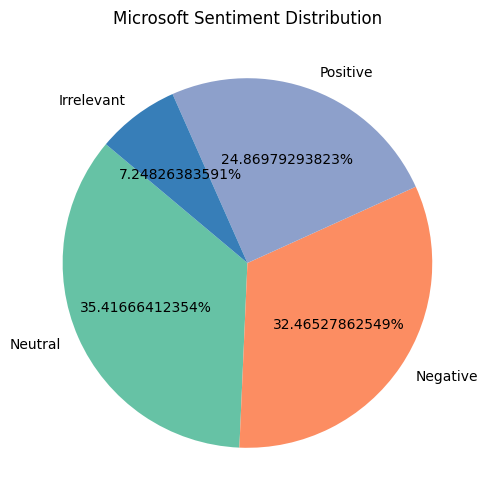

In [27]:
# Visualizing brand sentiment
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140,colors=['#66c2a5', '#fc8d62', '#8da0cb', '#377eb8'])
plt.title('Microsoft Sentiment Distribution')
plt.show()